# Logistic Regression

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the data

In [2]:
#Reading a csv file
df = pd.read_csv('titanic_cleaned.csv')

In [3]:
#Dimension of the dataframe
df.shape

(891, 25)

In [4]:
#First 10 rows of the dataframe
df.head(10)

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.000000,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.000000,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.000000,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.000000,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
5,0,29.699118,8.4583,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
6,0,54.000000,51.8625,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
7,0,2.000000,21.0750,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
8,1,27.000000,11.1333,0,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
9,1,14.000000,30.0708,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0


### Normalizing using min_max_scaler

MinMaxScaler() scales the variables between 0 and 1.

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [6]:
cols = df.columns
cols

Index(['Survived', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3',
       'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2',
       'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [7]:
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=cols)
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.271174,0.014151,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.472229,0.139136,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.321438,0.015469,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.434531,0.103644,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.434531,0.015713,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Segragating variables : Independent and Dependent variables

In [8]:
#Seperating independent and dependent variables
X = df.drop('Survived', axis=1)
y = df['Survived']

### Splitting the data into Train set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

### Implementing Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [11]:
#Creating an instance of  Logistic Regression
lr = LogisticRegression()
#Fitting the model
lr.fit(X_train, y_train)

LogisticRegression()

### Making Predictions

In [12]:
#Predicting over the Train set and calculating F1 score
train_pred = lr.predict(X_train)
print("Train F1 Score : ", f1_score(train_pred, y_train))

Train F1 Score :  0.7402862985685071


In [13]:
#Predicting over the Test set and calculating F1 score
test_pred = lr.predict(X_test)
print("Test F1 Score : ", f1_score(test_pred, y_test))

Test F1 Score :  0.7142857142857143


### Predict Probabilities

In [14]:
#Predict over the Train
train_pred = lr.predict_proba(X_train)
train_pred

array([[0.10731802, 0.89268198],
       [0.75314073, 0.24685927],
       [0.81442316, 0.18557684],
       ...,
       [0.5407515 , 0.4592485 ],
       [0.67774285, 0.32225715],
       [0.90946686, 0.09053314]])

In [15]:
#Predict over the Test
test_pred = lr.predict_proba(X_test)
test_pred

array([[0.91534193, 0.08465807],
       [0.26722234, 0.73277766],
       [0.77924533, 0.22075467],
       [0.31069594, 0.68930406],
       [0.89821   , 0.10179   ],
       [0.19064433, 0.80935567],
       [0.08694747, 0.91305253],
       [0.67846286, 0.32153714],
       [0.77401715, 0.22598285],
       [0.77048248, 0.22951752],
       [0.45904878, 0.54095122],
       [0.06788132, 0.93211868],
       [0.93538798, 0.06461202],
       [0.91468891, 0.08531109],
       [0.66447638, 0.33552362],
       [0.91194928, 0.08805072],
       [0.58045589, 0.41954411],
       [0.90314249, 0.09685751],
       [0.23993569, 0.76006431],
       [0.90591947, 0.09408053],
       [0.19349604, 0.80650396],
       [0.71790561, 0.28209439],
       [0.85162345, 0.14837655],
       [0.42486678, 0.57513322],
       [0.93829703, 0.06170297],
       [0.90951939, 0.09048061],
       [0.61098036, 0.38901964],
       [0.91150427, 0.08849573],
       [0.09801434, 0.90198566],
       [0.57955895, 0.42044105],
       [0.

In [16]:
train_pred = train_pred[:, 1]
train_pred

array([0.89268198, 0.24685927, 0.18557684, 0.76034982, 0.79386531,
       0.49212556, 0.31567076, 0.08661398, 0.71124513, 0.20069926,
       0.2249168 , 0.04159821, 0.33454131, 0.10329444, 0.41146117,
       0.498501  , 0.20075758, 0.28751002, 0.11269235, 0.12818028,
       0.26995879, 0.10784871, 0.14532454, 0.11961722, 0.06169764,
       0.26251233, 0.73724303, 0.11961722, 0.68804491, 0.08521895,
       0.77158866, 0.91983307, 0.9420395 , 0.62632436, 0.29502223,
       0.90190835, 0.93076239, 0.9174371 , 0.09556046, 0.60438969,
       0.20075758, 0.09883271, 0.89624357, 0.70834543, 0.35651526,
       0.74670371, 0.08521895, 0.94298863, 0.80946164, 0.47593038,
       0.10103406, 0.13084572, 0.89222078, 0.68931852, 0.20039785,
       0.11961755, 0.6966029 , 0.51236427, 0.08095127, 0.0827823 ,
       0.10101706, 0.94113862, 0.68929815, 0.08664952, 0.27900196,
       0.42799887, 0.84729471, 0.14255438, 0.53489397, 0.68510431,
       0.24025379, 0.75920377, 0.89557256, 0.42175798, 0.21653

In [17]:
test_pred = test_pred[:, 1]
test_pred

array([0.08465807, 0.73277766, 0.22075467, 0.68930406, 0.10179   ,
       0.80935567, 0.91305253, 0.32153714, 0.22598285, 0.22951752,
       0.54095122, 0.93211868, 0.06461202, 0.08531109, 0.33552362,
       0.08805072, 0.41954411, 0.09685751, 0.76006431, 0.09408053,
       0.80650396, 0.28209439, 0.14837655, 0.57513322, 0.06170297,
       0.09048061, 0.38901964, 0.08849573, 0.90198566, 0.42044105,
       0.68929815, 0.13942568, 0.11961722, 0.4971331 , 0.3869676 ,
       0.09563532, 0.15242585, 0.69457567, 0.09511957, 0.10866909,
       0.18920506, 0.68929815, 0.45031967, 0.65518474, 0.85843609,
       0.15205108, 0.07568427, 0.0852278 , 0.11023504, 0.42262522,
       0.28841416, 0.18443015, 0.08371894, 0.90019167, 0.08523139,
       0.1150848 , 0.08521895, 0.0925042 , 0.13645646, 0.76891888,
       0.50393811, 0.43187098, 0.08521895, 0.08805072, 0.69457567,
       0.15242585, 0.73369121, 0.76489322, 0.86720122, 0.63690499,
       0.94698084, 0.16786743, 0.10098056, 0.11961722, 0.08521

In [18]:
for i in range(0, len(train_pred)):
    if train_pred[i] > 0.55:
        train_pred[i] = 1
    else:
        train_pred[i] = 0

In [19]:
for i in range(0, len(test_pred)):
    if test_pred[i] > 0.55:
        test_pred[i] = 1
    else:
        test_pred[i] = 0

In [20]:
#Calculating F1-Score for train
print("Train F1-Score : ", f1_score(train_pred, y_train))

Train F1-Score :  0.7404255319148936


In [21]:
#Calculating F1-Score for test
print("Test F1-Score : ", f1_score(test_pred, y_test))

Test F1-Score :  0.7169811320754716


### Confusion Matrix

In [22]:
#Confusion matrix for train
from sklearn.metrics import confusion_matrix
confusion_matrix(train_pred, y_train)

array([[372,  82],
       [ 40, 174]], dtype=int64)

In [23]:
#Confusion matrix for test
confusion_matrix(test_pred, y_test)

array([[121,  29],
       [ 16,  57]], dtype=int64)

### Classification Report

In [24]:
#Classification report for train
from sklearn.metrics import classification_report
print(classification_report(train_pred, y_train))

              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86       454
         1.0       0.68      0.81      0.74       214

    accuracy                           0.82       668
   macro avg       0.79      0.82      0.80       668
weighted avg       0.83      0.82      0.82       668



In [25]:
#Classification report for test
print(classification_report(test_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.88      0.81      0.84       150
         1.0       0.66      0.78      0.72        73

    accuracy                           0.80       223
   macro avg       0.77      0.79      0.78       223
weighted avg       0.81      0.80      0.80       223



### Parameters of Logistic Regression

In [26]:
#Coefficients
lr.coef_

array([[-1.93866647,  0.3772856 ,  1.0207967 , -0.0127137 , -1.00817957,
         1.2562218 , -1.25631837,  0.59425622,  0.61330798,  0.5769966 ,
        -0.82291316, -0.45681554,  0.        , -0.50492867,  0.16178091,
         0.51942353,  0.5408331 ,  0.2666139 , -0.64489526, -0.49914612,
        -0.34470662,  0.03260839,  0.31258167, -0.34528662]])

In [27]:
#Intercept
lr.intercept_

array([0.18774713])

### Plotting the coefficients

Text(0.5, 1.0, 'Coefficient Plot')

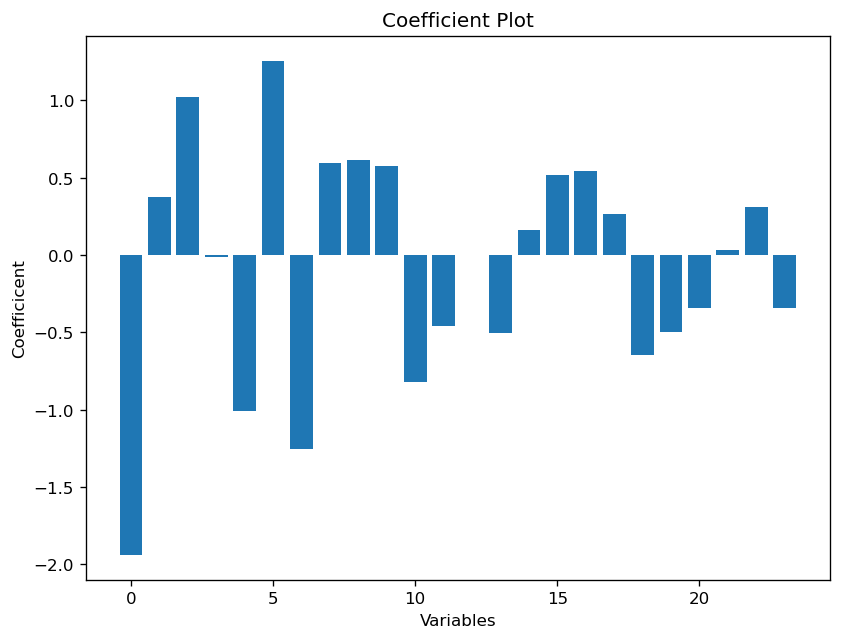

In [28]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(X_train.columns))
c = lr.coef_.reshape(-1)
plt.bar(x, c)
plt.xlabel('Variables')
plt.ylabel('Coefficicent')
plt.title('Coefficient Plot')

In [29]:
Coefficients = pd.DataFrame({
    'variable' : X_train.columns,
    'coefficient' : abs(lr.coef_.reshape(-1))
})
Coefficients.head(10)

,variable,coefficient
0,Age,1.938666
1,Fare,0.377286
2,Pclass_1,1.020797
3,Pclass_2,0.012714
4,Pclass_3,1.008180
5,Sex_female,1.256222
6,Sex_male,1.256318
7,SibSp_0,0.594256
8,SibSp_1,0.613308
9,SibSp_2,0.576997


In [30]:
#Selecting a variable with high coefficient
sig_var = Coefficients[Coefficients.coefficient > 0.3]
sig_var

,variable,coefficient
0,Age,1.938666
1,Fare,0.377286
2,Pclass_1,1.020797
4,Pclass_3,1.008180
5,Sex_female,1.256222
6,Sex_male,1.256318
7,SibSp_0,0.594256
8,SibSp_1,0.613308
9,SibSp_2,0.576997
10,SibSp_3,0.822913


In [31]:
#Creating a subset of data
subset = df[sig_var['variable'].values]
subset

,Age,Fare,Pclass_1,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_8,Parch_1,Parch_2,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.472229,0.139136,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.321438,0.015469,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0.025374,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
887,0.233476,0.058556,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.367921,0.045771,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
889,0.321438,0.058556,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
#Creating Train and Test set 
X_train, X_test, y_train, y_test = train_test_split(subset, y, random_state=42, stratify=y)

### Implementing Logistic Regression

In [33]:
#Creating an instance of Logistic Regression
lr = LogisticRegression()
#Fitting a model
lr.fit(X_train, y_train)

LogisticRegression()

### Make Predictions

In [34]:
#Predicting over the Train set and calculating F1-Score
train_pred = lr.predict(X_train)
print("Train F1-Score : ", f1_score(train_pred, y_train))

Train F1-Score :  0.7413441955193483


In [35]:
#Predicting over the Test set and calculating F1-Score
test_pred = lr.predict(X_test)
print("Test F1-Score : ", f1_score(test_pred, y_test))

Test F1-Score :  0.7065868263473054


### Confusion Matrix

In [36]:
#Confusion matrix for Train
confusion_matrix(train_pred, y_train)

array([[359,  74],
       [ 53, 182]], dtype=int64)

In [37]:
#Confusion matrix for Test
confusion_matrix(test_pred, y_test)

array([[115,  27],
       [ 22,  59]], dtype=int64)

   ### Classification Report

In [38]:
#Classification Report for Train
print(classification_report(train_pred, y_train))

              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       433
         1.0       0.71      0.77      0.74       235

    accuracy                           0.81       668
   macro avg       0.79      0.80      0.80       668
weighted avg       0.81      0.81      0.81       668



In [39]:
#Classification Report for Test
print(classification_report(test_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82       142
         1.0       0.69      0.73      0.71        81

    accuracy                           0.78       223
   macro avg       0.76      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



### Parameters of Logistic Regression

In [40]:
#Coefficients
lr.coef_

array([[-1.93260267,  0.3705437 ,  1.03198422, -1.0002629 ,  1.25416337,
        -1.25415901,  0.60094822,  0.61505663,  0.5812276 , -0.82455109,
        -0.46398584, -0.50869115,  0.3777324 ,  0.40714776, -0.69236608,
        -0.57383804, -0.37340524,  0.28855916, -0.37632561]])

In [41]:
#Intecept
lr.intercept_

array([0.35719629])

### Plotting the Coefficients

Text(0.5, 1.0, 'Coefficient Plot')

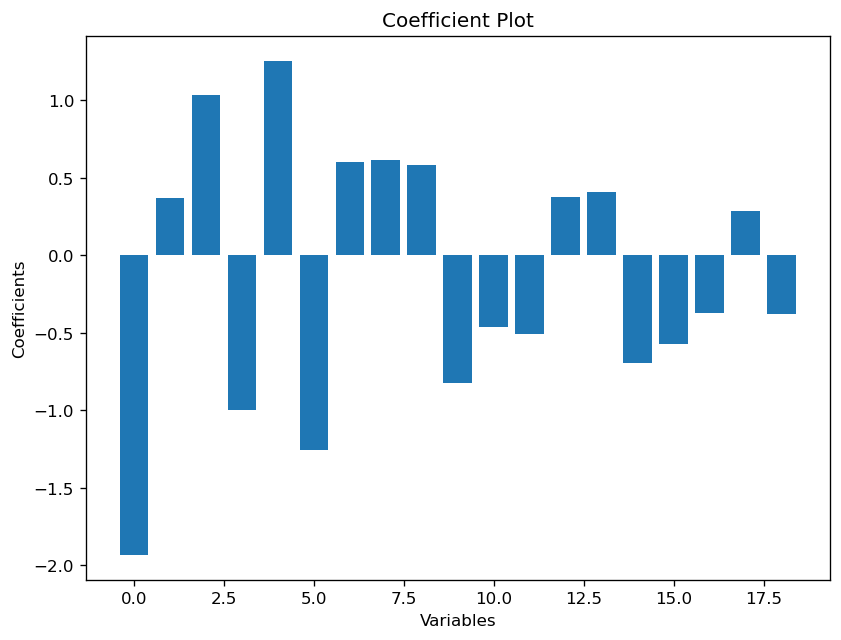

In [42]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(X_train.columns))
c = lr.coef_.reshape(-1)
plt.bar(x, c)
plt.xlabel("Variables")
plt.ylabel('Coefficients')
plt.title("Coefficient Plot")